## Задание:
1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.

2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

## Импорт библиотек

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## №1 Поиск пропусков и их удаление

In [2]:
df = pd.read_csv('row_data/fifa_s2.csv')

print(df.shape)
print(df.dtypes)
df

(2399, 18)
ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                          int64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,1.0,3.0,CM,2018,01/01/2019,5.916667,165.0,1400.0
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,1.0,2.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,1.0,3.0,RW,2018,01/01/2020,5.833333,154.0,2600.0
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,1.0,2.0,LB,2018,01/01/2019,5.583333,139.0,2200.0


In [3]:
df.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   7
Overall                       0
Potential                     0
Club                        241
Value                       257
Wage                          0
Preferred Foot                0
International Reputation     10
Skill Moves                   6
Position                     21
Joined                        0
Contract Valid Until        273
Height                        0
Weight                        0
Release Clause                3
dtype: int64

In [9]:
empty_columns = []
for col in df.columns:
    missing_valurs = np.mean(df[col].isnull())
    print(f'{col} - {round(missing_valurs*100)}')
    if (missing_valurs > 0.1):
        empty_columns.append(col)
print(f'Поля где пропусков больше 10%: {empty_columns}')

ID - 0
Name - 0
Age - 0
Nationality - 0
Overall - 0
Potential - 0
Club - 10
Value - 11
Wage - 0
Preferred Foot - 0
International Reputation - 0
Skill Moves - 0
Position - 1
Joined - 0
Contract Valid Until - 11
Height - 0
Weight - 0
Release Clause - 0
Nationality_ismissing - 0
Club_ismissing - 0
Value_ismissing - 0
International Reputation_ismissing - 0
Skill Moves_ismissing - 0
Position_ismissing - 0
Contract Valid Until_ismissing - 0
Release Clause_ismissing - 0
nun_missing - 0
Поля где пропусков больше 10%: ['Club', 'Value', 'Contract Valid Until']


<Axes: >

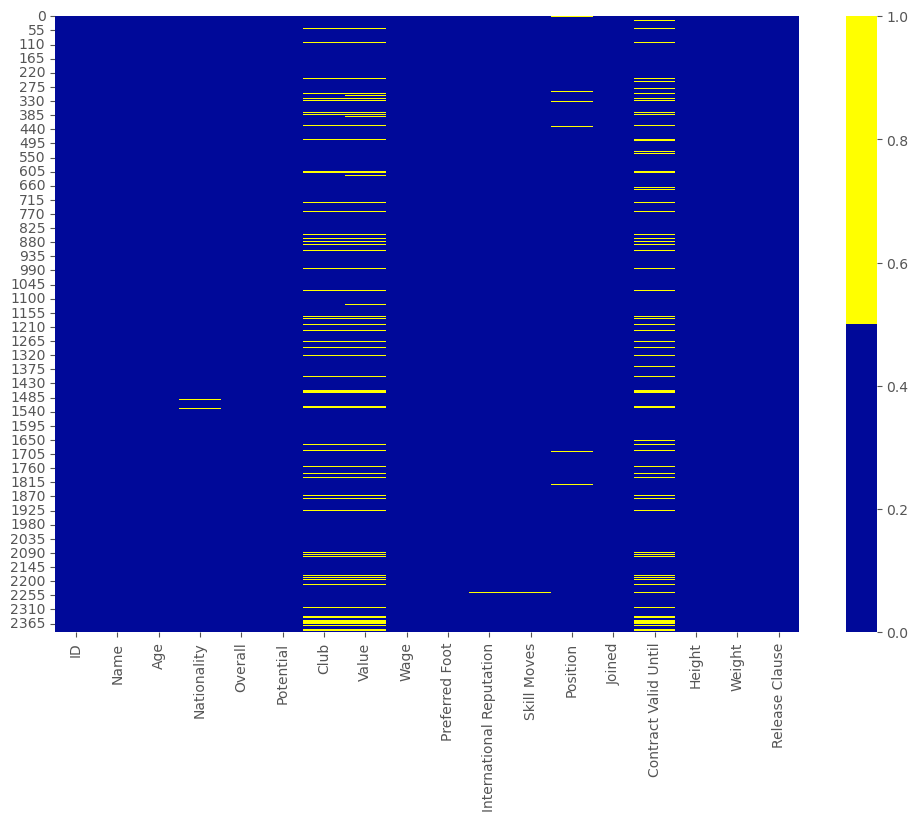

In [6]:
cols = df.columns[:]
# Жёлтый цвет - пропуски
colours = ['#000999', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: Nationality
created missing indicator for: Club
created missing indicator for: Value
created missing indicator for: International Reputation
created missing indicator for: Skill Moves
created missing indicator for: Position
created missing indicator for: Contract Valid Until
created missing indicator for: Release Clause


<Axes: xlabel='nun_missing'>

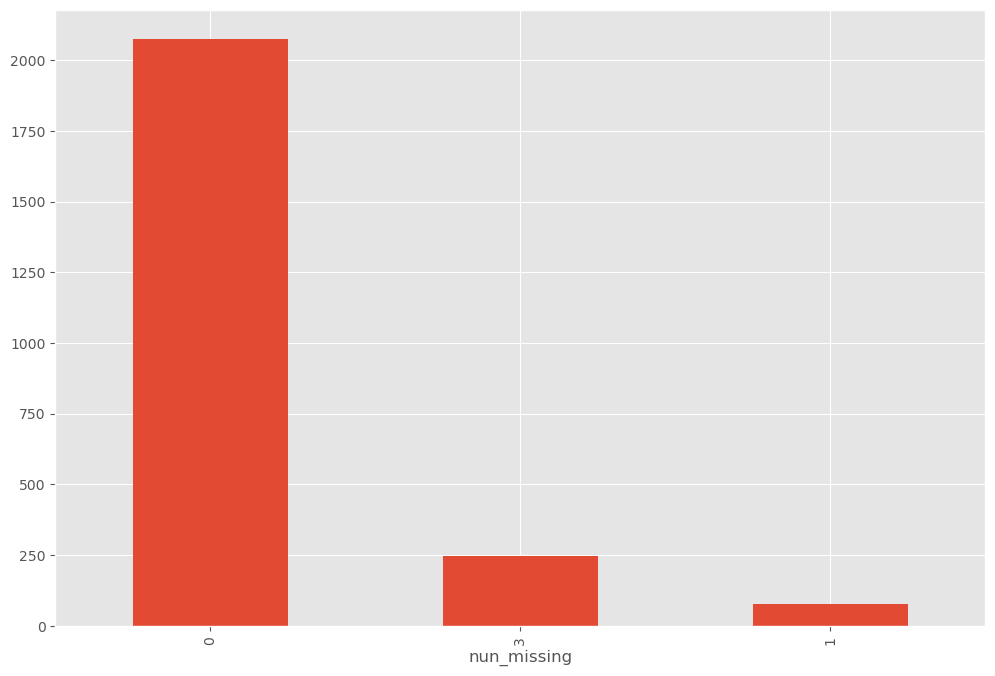

In [5]:
# Посчитаем количество строк с разным количеством пропусков
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print(f'created missing indicator for: {col}')
        df[f'{col}_ismissing'] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['nun_missing'] = df[ismissing_cols].sum(axis=1)
df['nun_missing'].value_counts().plot.bar(y='num_missing')

In [24]:
# Удалим несколько не особо полезных для нас полей 

columns_cleaned = ['Overall', 'Potential', 'Skill Moves', 'Nationality_ismissing', 'Club_ismissing', 'Value_ismissing', 
'International Reputation_ismissing', 'Skill Moves_ismissing', 'Position_ismissing', 'Contract Valid Until_ismissing',
'Release Clause_ismissing', 'nun_missing']
df_cleaned = df.drop(columns_cleaned, axis=1)

# df_cleaned = df_cleaned.dropna(thresh=len(df.columns)-1)
# Пропущенных значений не очень много, поэтому можно удалить все строки с пропусками
df_cleaned = df_cleaned.dropna()
print(f'Данные до очистки {df.shape}')
print(f'Данные после очистки {df_cleaned.shape}')
df_cleaned.isna().sum()

Данные до очистки (2399, 27)
Данные после очистки (2075, 15)


ID                          0
Name                        0
Age                         0
Nationality                 0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

## №2 Поиск и удаление дубликатов

In [25]:
# Приводим в колонке позиции все данные в большой регистр
df_cleaned['Position'] = df_cleaned['Position'].str.upper()

# Приводим остальные строковые данные к маленькому регистру для избежания ошибок (в поле Preferred Foot ошибок нет)
character_columns = ['Name', 'Nationality', 'Club']
for col in character_columns:
    df_cleaned[col] = df_cleaned[col].str.lower()

In [26]:
df_cleaned.head()

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,g. buffon,40,italy,paris saint-germain,4000.0,77,Right,4.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
2,8205,braga,35,portugal,cd aves,750.0,5,Right,1.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,a. robben,34,netherlands,fc bayern münchen,15500.0,110,Left,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,j. ibehre,35,england,cambridge united,120.0,2,Right,1.0,ST,2017,01/01/2019,6.333333,203.0,210.0
5,20209,ricardo costa,37,portugal,cd tondela,750.0,4,Right,2.0,LCB,2017,01/01/2019,6.000000,181.0,1600.0


In [29]:
print(df_cleaned.shape)
print(f'Количество абсолютных дубликатов: {df_cleaned.duplicated().sum()}')

# Удаление абсолютных дубликатов
df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)
print(df_cleaned.shape)

print(df_cleaned.dtypes)

(2073, 15)
Количество абсолютных дубликатов: 0
(2073, 15)
ID                            int64
Name                         object
Age                           int64
Nationality                  object
Club                         object
Value                       float64
Wage                          int64
Preferred Foot               object
International Reputation    float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object


## №3 Функция, 
которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36.


In [31]:
def age_category(age):
    if age <  20:
        return 'Несовершенолетний футболист'
    elif  20 <= age <  30:
        return 'Молодой футболист'
    elif  30 <= age <  36:
        return 'Взрослый футболист'
    else:
        return 'Футбольный тренер'

In [33]:
df_cleaned['Category'] = df_cleaned['Age'].apply(age_category)
df_cleaned

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Category
0,1179,g. buffon,40,italy,paris saint-germain,4000.0,77,Right,4.0,GK,2018,01/01/2019,6.333333,203.0,7400.0,Футбольный тренер
1,8205,braga,35,portugal,cd aves,750.0,5,Right,1.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0,Взрослый футболист
2,9014,a. robben,34,netherlands,fc bayern münchen,15500.0,110,Left,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0,Взрослый футболист
3,19521,j. ibehre,35,england,cambridge united,120.0,2,Right,1.0,ST,2017,01/01/2019,6.333333,203.0,210.0,Взрослый футболист
4,20209,ricardo costa,37,portugal,cd tondela,750.0,4,Right,2.0,LCB,2017,01/01/2019,6.000000,181.0,1600.0,Футбольный тренер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,246465,guerrero,16,spain,cf rayo majadahonda,625.0,1,Left,1.0,CM,2018,01/01/2019,5.916667,165.0,1400.0,Несовершенолетний футболист
2069,246594,h. massengo,16,france,as monaco,450.0,2,Right,1.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0,Несовершенолетний футболист
2070,246599,guillem jaime,19,spain,fc barcelona,975.0,13,Right,1.0,RW,2018,01/01/2020,5.833333,154.0,2600.0,Несовершенолетний футболист
2071,246606,fran garcía,18,spain,real madrid,825.0,9,Left,1.0,LB,2018,01/01/2019,5.583333,139.0,2200.0,Несовершенолетний футболист


In [34]:
unique_values = df_cleaned['Category'].value_counts()
print(unique_values)

Category
Молодой футболист              1415
Взрослый футболист              379
Несовершенолетний футболист     262
Футбольный тренер                17
Name: count, dtype: int64
